In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
FF=pd.read_csv('forestfires.csv')
FF.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [263]:
FF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [264]:
FF.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [265]:
FF['month']=pd.to_datetime(FF['month'], format='%b').dt.month
FF['day']=FF['day'].str.capitalize()
FF['day'].replace(to_replace=['Fri', 'Tue', 'Sat', 'Sun', 'Mon', 'Wed', 'Thu'], value=[5,2,6,7,1,3,4],inplace=True)
FF.info()
FF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [243]:
FF['day'].unique()

array([5, 2, 6, 7, 1, 3, 4])

In [244]:
FF.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [245]:
print(FF.shape)
print(FF.shape[0])

(517, 13)
517


In [246]:
FF.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

0   1   2   3   4   5   6   7  8
0   0   0   0   0   0   0   0   0  0
1  19  25   0   0   0   0   0   0  0
2  10   1   1  22   0  25   2   3  0
3  15  27  43  36  23   9  45   1  4
4   4  20   7  25   3  49  11   4  2
5   0   0   4   8   4   3   2  52  1
6   0   0   0   0   0   0   0   0  0
7   0   0   0   0   0   0   0   1  0
8   0   0   0   0   0   0   0   0  6


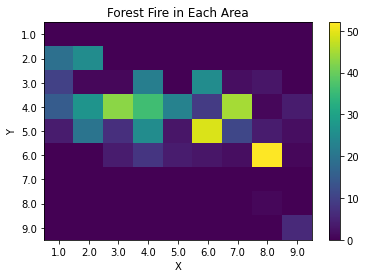

In [293]:
#plot a heatmap according to the results
heat=[[0]*9 for i in range(9)]
heat2=[[0]*9 for i in range(9)]
for i in range(FF.shape[0]):
    heat[FF.X[i]-1][FF.Y[i]-1]+=1
    heat2[FF.X[i]-1][9-(FF.Y[i]-1)-1]+=1
    #print(FF.X[i], FF.Y[i])
print(pd.DataFrame(heat).T)
x=[i+0.5 for i in range(9)]
y=[9-0.5-i for i in range(9)]
fig,ax=plt.subplots()
plt.pcolor(pd.DataFrame(heat).T)
ax.set_xticks(x)
ax.set_xticklabels([i+0.5 for i in x])
ax.set_yticks(y)
ax.set_yticklabels([i+0.5 for i in y])
#plt.pcolor(pd.DataFrame(heat2).T)
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().invert_yaxis()
plt.title('Forest Fire in Each Area')
#plt.show()
plt.savefig('Heatmap')
plt.show()


,Counts of Forest Fire
mean,3.590278
std,3.786325
min,0.250000
25%,0.750000
50%,1.875000
75%,5.875000
max,13.000000


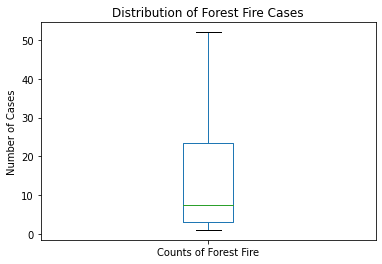

In [259]:
#group by x and y, and show distribution plot
FF['Coordinate']=FF.X.astype(str)+FF.Y.astype(str)
cases=pd.DataFrame(FF.groupby(['Coordinate']).count().X)
cases.columns=['Counts of Forest Fire']
cases.plot(kind='box')
plt.title('Distribution of Forest Fire Cases')
plt.ylabel('Number of Cases')
plt.show
plt.savefig('FFC distribution')

A=pd.DataFrame(cases.describe())/4
A.drop(index='count')

In [249]:
print(cases.quantile(0.75)/4)
print(cases.quantile(0.25)/4)

Counts of Forest Fire    5.875
Name: 0.75, dtype: float64
Counts of Forest Fire    0.75
Name: 0.25, dtype: float64


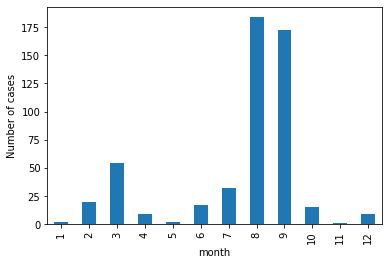

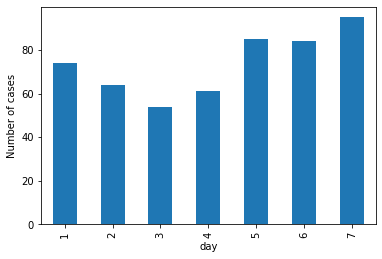

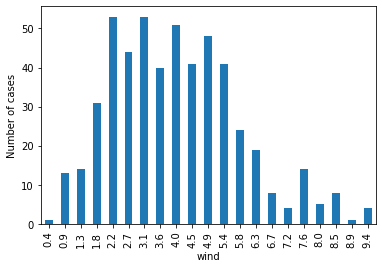

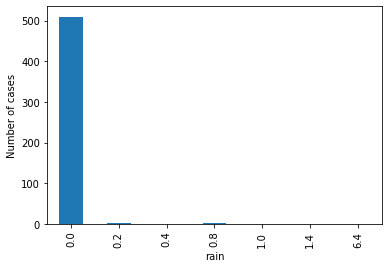

In [253]:

for i in ['month', 'day', 'wind', 'rain']:
    df=FF.groupby([i]).count()['X']
    df.plot(kind='bar')
    plt.ylabel('Number of cases')
    plt.savefig(i)
    plt.show()


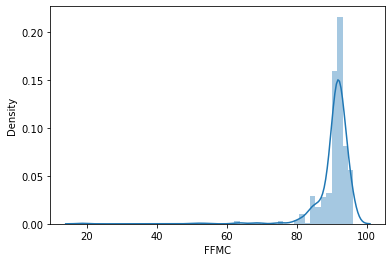

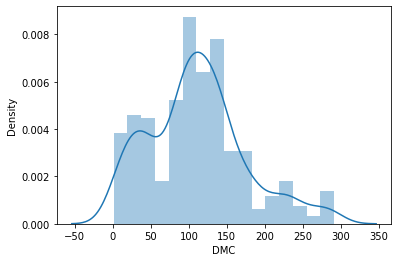

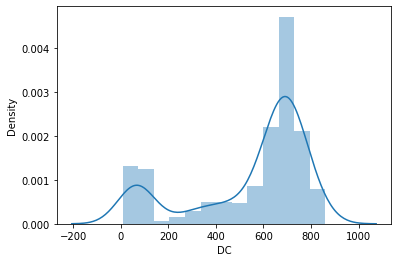

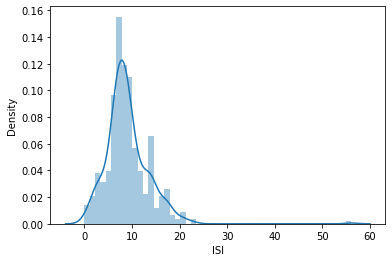

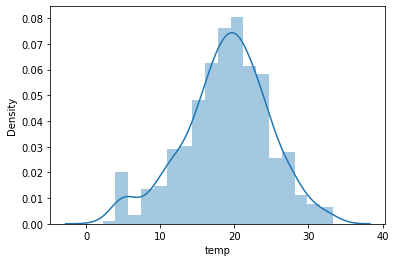

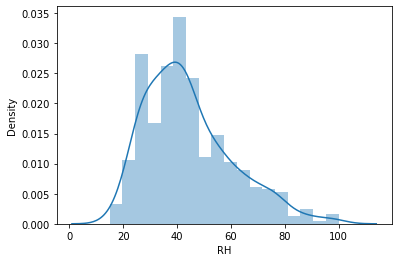

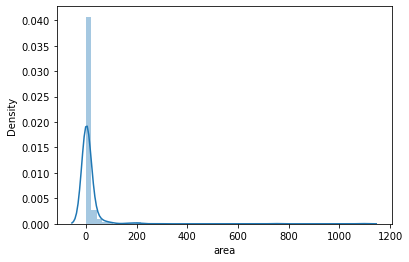

In [309]:
for i in ['FFMC', 'DMC', 'DC','ISI', 'temp', 'RH','area']:
    sns.distplot(FF[i])
    plt.xlabel(i)
    plt.savefig(i)
    plt.show()

In [319]:
Rest=FF[['FFMC', 'DMC', 'DC','ISI']]
Rest.describe()

,FFMC,DMC,DC,ISI
count,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663
std,5.520111,64.046482,248.066192,4.559477
min,18.700000,1.100000,7.900000,0.000000
25%,90.200000,68.600000,437.700000,6.500000
50%,91.600000,108.300000,664.200000,8.400000
75%,92.900000,142.400000,713.900000,10.800000
max,96.200000,291.300000,860.600000,56.100000
